# AI BOOTCAMP QUALIFICATION COMPETITION 2021
___
#### Aim : To predict the behaviour of sapa.com customers towards responding to a marketing campaign
#### Objective : To create a binary classification machine learning model to perform this task
#### Business problem : Predicting if a customer will respond to a marketing campaign
#### Machine Learning problem : Understanding the given parameters, and checking how these parameter affect the responsiveness of a customer
___
#### Methodology
* Import all neccessary libraries
* Load dataset
* prepare submission file and drop unwanted data
* Exploratory Data Analysis
* impute missing values
* Check for anomalies, that is, outliers/noise, and clean the data
* Preprocessing
* Feature selection and engineering
* Dealing with imbalanced dataset
* Build models and make predictions
* Check for accuracy, using evaluation metrics
* Present / Submit the results

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Plotting charts
%matplotlib inline
import seaborn as sns # Plotting charts
sns.set_style('darkgrid') # for setting styles to be used for visualization
from datetime import datetime # for time series

from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.preprocessing import KBinsDiscretizer # for binning columns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # for encoding categorical data
from sklearn.model_selection import GridSearchCV, cross_val_score # for cross validation
from sklearn.model_selection import train_test_split, StratifiedKFold # for splitting the dataset
from sklearn.metrics import log_loss, accuracy_score, f1_score, roc_auc_score, make_scorer, precision_score, recall_score, confusion_matrix, classification_report, roc_curve # evaluation metrics
from sklearn.pipeline import Pipeline # for making pipelines for the model
from collections import Counter
from imblearn.over_sampling import SMOTE

# algorithms to consider for building the model
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, cv, Pool
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
submission = pd.read_csv('SampleSubmission.csv')

In [3]:
train.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,22-06-2014,56,2,...,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,01-08-2013,17,6,...,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,21-11-2013,17,0,...,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,13-09-2013,49,3,...,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,21-01-2014,59,1,...,165,203,1,0,0,0,1,0,0,0


In [4]:
test.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,...,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,Single,48556.8,0,1,11-01-2013,85,6,...,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,Widow,57499.2,0,1,22-11-2012,79,5,...,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,Married,17025.6,0,0,28-02-2013,47,1,...,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,Together,91983.6,0,0,16-08-2013,98,1,...,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,Together,78235.2,0,2,25-07-2013,41,2,...,12,0,200,5,1,0,0,0,0,0


In [5]:
submission.head()

,ID,Response
0,ID_ZPMABNVX,NaN
1,ID_WFE91NAA,NaN
2,ID_JV11RBRK,NaN
3,ID_6B7SVKY9,NaN
4,ID_GOVUZ545,NaN


In [6]:
# preparing submission file
submission.drop('Response', axis = 1, inplace = True)
submission['ID'] = test['ID']

In [7]:
submission

,ID
0,ID_ZPMABNVX
1,ID_WFE91NAA
2,ID_JV11RBRK
3,ID_6B7SVKY9
4,ID_GOVUZ545
...,...
667,ID_1D68PV28
668,ID_TM6CYFZO
669,ID_VHR666SC
670,ID_O852YAO1


#### Categorical columns

Education_level, Marital_Status

#### Numerical columns

year_of_birth, Disposable_income, no_of_kids_in_home, no_of_teen_in_home, recency, StorePurchases,  Discounted_Purchases, WebPurchases, CatalogPurchases,
Amount_on_Wines, Amount_on_Fruits, Amount_on_MeatProducts, Amount_on_FishProducts, Amount_on_SweetProducts, Amount_on_GoldProds, WebVisitsMonth,
Cmp3Accepted, Cmp4Accepted, Cmp5Accepted, Cmp1Accepted, Cmp2Accepted, Any_Complain, Response.

#### Time Series feature

date_cutomer

# Processors

In [8]:
#  function to replace missing value by mode of col    
def replace_nan_mean(data = '', cols = []):
    '''Replaces missing with mode'''
    for col in cols:
        data[col] = data[col].fillna(data[col].mean())

#  function to print the shape train and test
def print_shape(train, test):
    '''prints the shape of the dataset'''
    print('Shape of train {}'.format(train.shape))
    print('Shape of test {}'.format(test.shape))

#  function for treating outliers
def rangevalues(col):
    sorted(col)
    q1, q3 = col.quantile([0.25,0.75])
    iqr = q3 - q1
    lower_range = q1 - (1.5 * iqr)
    upper_range = q3 + (1.5 * iqr)  
    return lower_range, upper_range
 
def remove_outliers(data = '',cols = []):
    print('Before removing outliers')
    for a in cols:
        sns.boxplot(data[a])
        plt.title(a)
        plt.show()
    for x in cols:
        lower, upper = rangevalues(data[x])
        data[x] = np.where(data[x]<lower,lower,data[x])
        data[x] = np.where(data[x]>upper,upper,data[x])
    print('\n\nAfter removing outliers')
    for y in cols:
        sns.boxplot(data[y])
        plt.title(y)
        plt.show()

    
# checking number of unique variables in each columns
def no_unique(data):
    for cols in data.columns:
        print(cols + " " + str(data[cols].nunique()))

#  A function to drop columns
def drop_columns(data = '', col_names = []):
    ''' drops all specified column'''
    data.drop(col_names, axis = 1, inplace = True)

#Function for creating a dataframe based on order of importance of features
def feat_imp_sorter(model, x):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    feature_imp = pd.DataFrame(zip(model.feature_importances_,x.columns), columns=['Value','Features'])
    feature_imp.sort_values(by='Value',ignore_index=True, ascending=False, inplace = True)
    return feature_imp
    
#fUnction for ploting barplot for the feature importance of any model    
def feat_imp_ploter(model,x):
    sorted_feat = feat_imp_sorter(model,x)
    
    # plt.figure(figsize=(10, 10))
    sns.barplot(x="Value", y="Features", data=sorted_feat)
    plt.title(str(model) +'Features_important')
    plt.tight_layout()

    
#Function for Frequency encoding
def freq_encoding(col):
    train_encoding = train.groupby(train[col]).size()/len(train)
    test_encoding = test.groupby(test[col]).size()/len(test)
    train[str(col) + '_freq_enc'] = train[col].map(train_encoding)
    test[str(col) + '_freq_enc'] = test[col].map(test_encoding)

#function for saving the submission file
def submit(pred, name = ""):
    submission['Response'] = pred.astype(int)
    submission.to_csv(name, index=False)

### Exploratory Data Analysis

#### Information on Dataset

In [9]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1568 non-null   object 
 1   Year_of_Birth            1568 non-null   int64  
 2   Education_Level          1568 non-null   object 
 3   Marital_Status           1568 non-null   object 
 4   Disposable_Income        1552 non-null   float64
 5   No_of_Kids_in_home       1568 non-null   int64  
 6   No_of_Teen_in_home       1568 non-null   int64  
 7   Date_Customer            1568 non-null   object 
 8   Recency                  1568 non-null   int64  
 9   Discounted_Purchases     1568 non-null   int64  
 10  WebPurchases             1568 non-null   int64  
 11  CatalogPurchases         1568 non-null   int64  
 12  StorePurchases           1568 non-null   int64  
 13  Amount_on_Wines          1568 non-null   int64  
 14  Amount_on_Fruits        

(None, None)

#### Features I think are humanly important or not

##### Important

* age - bin then use log transformation (so creating three features in total, age, age_bin, age_log)
* disposable income - use binning to reduce number of unique values then use log transformation (so creating two features di_bin, di_log)
* recency - use binning to reduce number of unique values then use log transformation (so creating two features di_bin, di_log)
* combining purchases
* combining amounts spent
* webvisitsmonth
* combining cmps

##### Not-important

* Date_customer
* any_complain
* cmp2accepted
* education level
* marital status
* no of kids in home
* no of teen in home
* Disposable income (pending)

#### Summary of dataset

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Birth,1568.0,1970.073342,11.920781,1900.0,1960.0,1971.0,1979.00,1997.0
Disposable_Income,1552.0,62381.186598,32089.169563,2076.0,41612.4,60964.2,81493.20,799999.2
No_of_Kids_in_home,1568.0,0.460459,0.540361,0.0,0.0,0.0,1.00,2.0
No_of_Teen_in_home,1568.0,0.497449,0.544151,0.0,0.0,0.0,1.00,2.0
Recency,1568.0,55.408801,28.788037,7.0,31.0,56.0,80.00,106.0
Discounted_Purchases,1568.0,2.292730,1.937544,0.0,1.0,2.0,3.00,15.0
WebPurchases,1568.0,4.001276,2.773748,0.0,2.0,3.0,6.00,27.0
CatalogPurchases,1568.0,2.665816,3.043493,0.0,0.0,2.0,4.00,28.0
StorePurchases,1568.0,5.703444,3.260553,0.0,3.0,5.0,8.00,13.0
Amount_on_Wines,1568.0,303.190051,340.141396,5.0,27.0,167.0,499.50,1498.0


#### Checking the unique values of categorical variables

In [11]:
y = [x for x in train.columns if train[x].dtype == 'object']
for i in y[1:3]:
    print(train[i].unique())

['Graduation' '2n Cycle' 'Master' 'PhD' 'Basic']
['Divorced' 'Together' 'Single' 'Married' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [12]:
y = [x for x in test.columns if test[x].dtype == 'object']
for i in y[1:3]:
    print(test[i].unique())

['Graduation' 'Basic' 'Master' '2n Cycle' 'PhD']
['Single' 'Widow' 'Married' 'Together' 'Divorced' 'Absurd']


alone and yolo are absent in the test dataset

##### The categorical variables are nominal, so i will employ one hot encoding or dumming encoding

#### Checking the number of unique values for all variables

In [13]:
for col in train.columns:
    print(col,train[col].nunique())

ID 1568
Year_of_Birth 56
Education_Level 5
Marital_Status 8
Disposable_Income 1431
No_of_Kids_in_home 3
No_of_Teen_in_home 3
Date_Customer 619
Recency 100
Discounted_Purchases 15
WebPurchases 14
CatalogPurchases 14
StorePurchases 14
Amount_on_Wines 643
Amount_on_Fruits 148
Amount_on_MeatProducts 486
Amount_on_FishProducts 170
Amount_on_SweetProducts 163
Amount_on_GoldProds 199
WebVisitsMonth 16
Cmp3Accepted 2
Cmp4Accepted 2
Cmp5Accepted 2
Cmp1Accepted 2
Cmp2Accepted 2
Any_Complain 2
Response 2


In [14]:
for col in test.columns:
    print(col,test[col].nunique())
train.columns

ID 672
Year_of_Birth 54
Education_Level 5
Marital_Status 6
Disposable_Income 644
No_of_Kids_in_home 3
No_of_Teen_in_home 3
Date_Customer 419
Recency 100
Discounted_Purchases 14
WebPurchases 13
CatalogPurchases 12
StorePurchases 14
Amount_on_Wines 414
Amount_on_Fruits 126
Amount_on_MeatProducts 294
Amount_on_FishProducts 131
Amount_on_SweetProducts 130
Amount_on_GoldProds 156
WebVisitsMonth 12
Cmp3Accepted 2
Cmp4Accepted 2
Cmp5Accepted 2
Cmp1Accepted 2
Cmp2Accepted 2
Any_Complain 2


Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [15]:
# Disposable income seems to be almost unique for all customers
# 

In [16]:
print_shape(train, test)

Shape of train (1568, 27)
Shape of test (672, 26)


#### preprocessing

In [17]:
# treating missing value
display(train.isnull().sum(),test.isnull().sum())

ID                          0
Year_of_Birth               0
Education_Level             0
Marital_Status              0
Disposable_Income          16
No_of_Kids_in_home          0
No_of_Teen_in_home          0
Date_Customer               0
Recency                     0
Discounted_Purchases        0
WebPurchases                0
CatalogPurchases            0
StorePurchases              0
Amount_on_Wines             0
Amount_on_Fruits            0
Amount_on_MeatProducts      0
Amount_on_FishProducts      0
Amount_on_SweetProducts     0
Amount_on_GoldProds         0
WebVisitsMonth              0
Cmp3Accepted                0
Cmp4Accepted                0
Cmp5Accepted                0
Cmp1Accepted                0
Cmp2Accepted                0
Any_Complain                0
Response                    0
dtype: int64

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          8
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
dtype: int64

In [18]:
# combine amount to get total amount spent by a cutomer
train['Comb_Amount'] = train.Amount_on_Wines + train.Amount_on_Fruits + train.Amount_on_MeatProducts + train.Amount_on_FishProducts + train.Amount_on_SweetProducts + train.Amount_on_GoldProds
test['Comb_Amount'] = test.Amount_on_Wines + test.Amount_on_Fruits + test.Amount_on_MeatProducts + test.Amount_on_FishProducts + test.Amount_on_SweetProducts + test.Amount_on_GoldProds
# combine purchases to get total purchase made by a cutomer
train['Comb_Purchases'] = train.Discounted_Purchases  + train.WebPurchases + train.CatalogPurchases + train.StorePurchases
test['Comb_Purchases'] = test.Discounted_Purchases  + test.WebPurchases + test.CatalogPurchases + test.StorePurchases

In [19]:
# from Year_of_Birth get age by substracting year of birth from current year 
train['age'] = datetime.now().year - train['Year_of_Birth']
test['age'] = datetime.now().year - test['Year_of_Birth']
# comb no of kids and teen
train['no_of_children'] = train['No_of_Kids_in_home'] + train['No_of_Teen_in_home']
test['no_of_children'] = test['No_of_Kids_in_home'] + test['No_of_Teen_in_home']
# combining cmps expect cmp2
train['comb_cmps'] = train['Cmp1Accepted'] + train['Cmp3Accepted'] + train['Cmp4Accepted'] +  train['Cmp5Accepted']
test['comb_cmps'] = test['Cmp1Accepted'] + test['Cmp3Accepted'] + test['Cmp4Accepted'] + test['Cmp5Accepted']

In [20]:
# combine data
combine_set = pd.concat((train,test)).reset_index(drop=True)
combine_set.shape

(2240, 32)

In [21]:
# treating missing value in disposable income
replace_nan_mean(data = combine_set, cols = ['Disposable_Income'])

In [22]:
combine_set.isnull().sum()

ID                           0
Year_of_Birth                0
Education_Level              0
Marital_Status               0
Disposable_Income            0
No_of_Kids_in_home           0
No_of_Teen_in_home           0
Date_Customer                0
Recency                      0
Discounted_Purchases         0
WebPurchases                 0
CatalogPurchases             0
StorePurchases               0
Amount_on_Wines              0
Amount_on_Fruits             0
Amount_on_MeatProducts       0
Amount_on_FishProducts       0
Amount_on_SweetProducts      0
Amount_on_GoldProds          0
WebVisitsMonth               0
Cmp3Accepted                 0
Cmp4Accepted                 0
Cmp5Accepted                 0
Cmp1Accepted                 0
Cmp2Accepted                 0
Any_Complain                 0
Response                   672
Comb_Amount                  0
Comb_Purchases               0
age                          0
no_of_children               0
comb_cmps                    0
dtype: i

In [23]:
combine_set.fillna(-1, inplace = True)

In [24]:
combine_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   object 
 1   Year_of_Birth            2240 non-null   int64  
 2   Education_Level          2240 non-null   object 
 3   Marital_Status           2240 non-null   object 
 4   Disposable_Income        2240 non-null   float64
 5   No_of_Kids_in_home       2240 non-null   int64  
 6   No_of_Teen_in_home       2240 non-null   int64  
 7   Date_Customer            2240 non-null   object 
 8   Recency                  2240 non-null   int64  
 9   Discounted_Purchases     2240 non-null   int64  
 10  WebPurchases             2240 non-null   int64  
 11  CatalogPurchases         2240 non-null   int64  
 12  StorePurchases           2240 non-null   int64  
 13  Amount_on_Wines          2240 non-null   int64  
 14  Amount_on_Fruits        

Before removing outliers


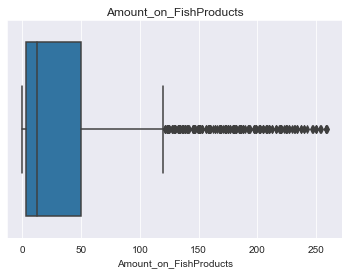

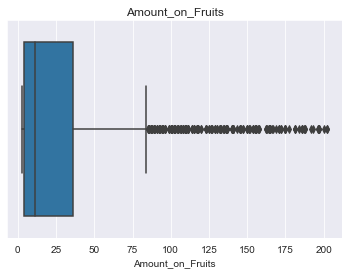

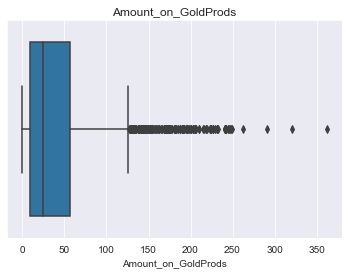

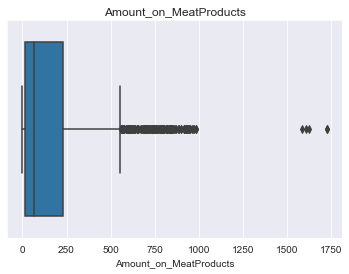

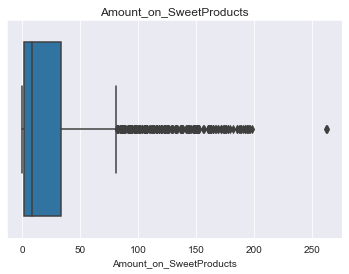

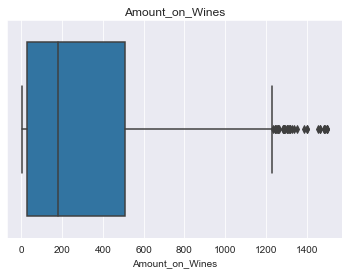

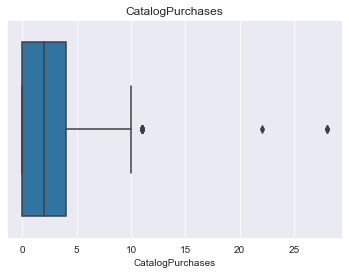

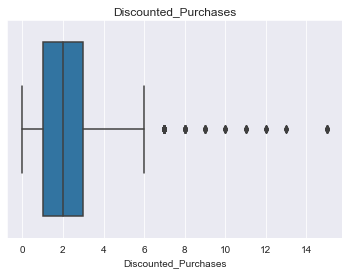

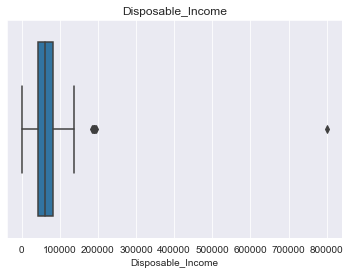

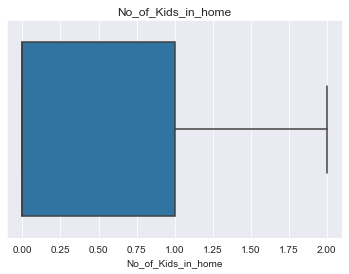

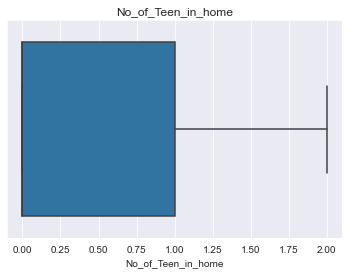

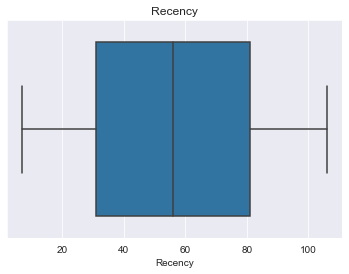

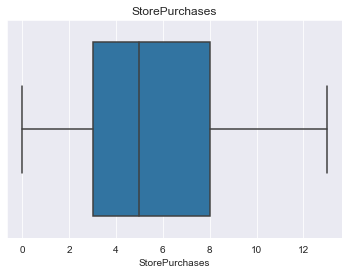

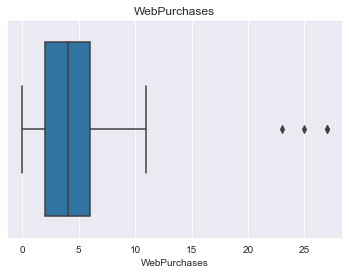

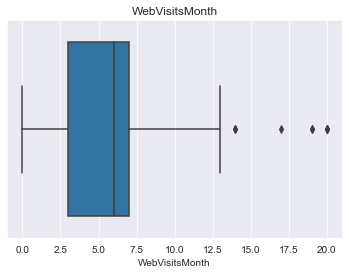

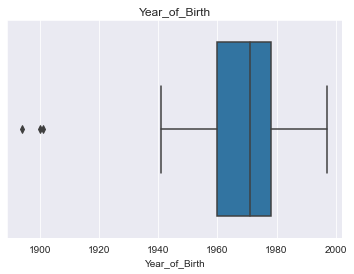



After removing outliers


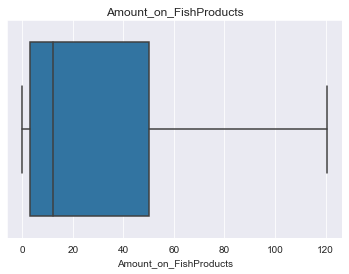

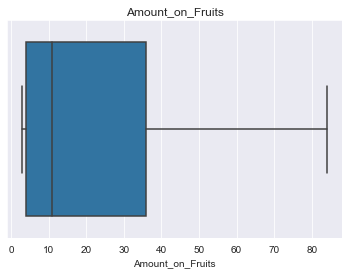

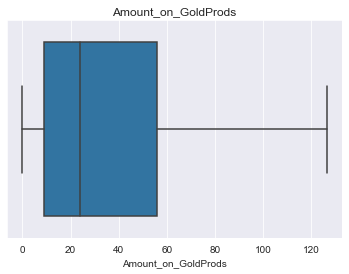

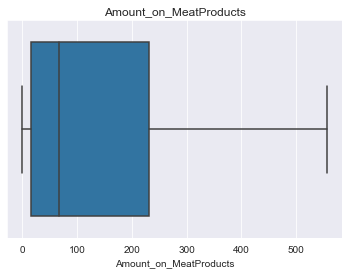

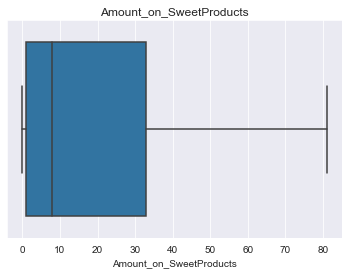

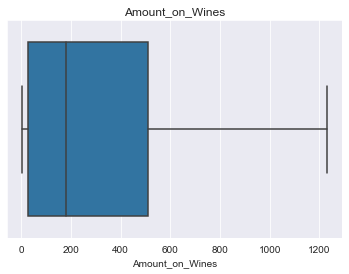

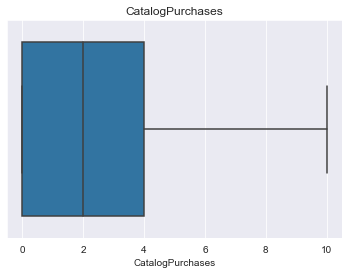

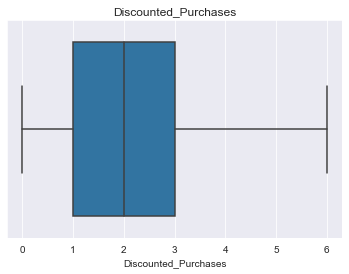

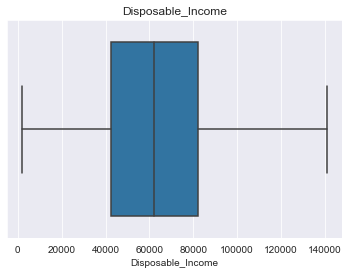

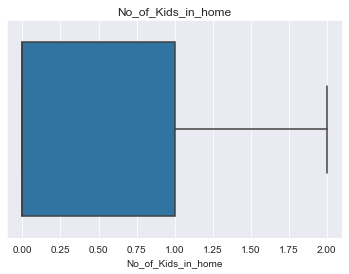

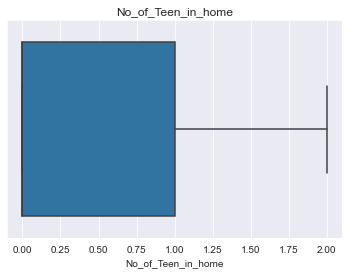

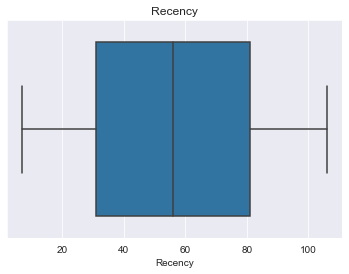

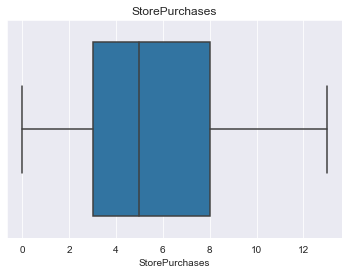

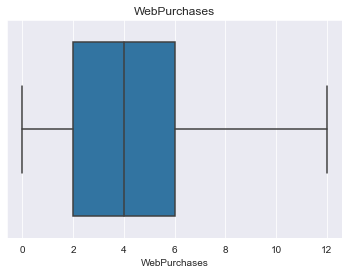

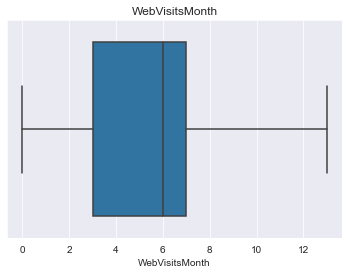

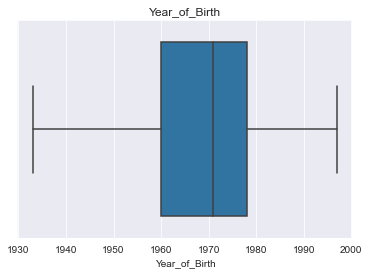

In [25]:
remove_outliers(data = combine_set,cols = combine_set.columns.difference(['ID', 'Education_Level', 'Marital_Status', 'Date_Customer', 'Cmp3Accepted', 'Cmp2Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted','Any_Complain', 'comb_cmps','Comb_Amount','Comb_Purchases','Response','age','no_of_children']))

In [26]:
# for numerical columns
Recency_discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
combine_set['Recency_Bins'] = Recency_discretizer.fit_transform(combine_set['Recency'].values.reshape(-1,1)).astype(float)

age_discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
combine_set['age_Bins'] = age_discretizer.fit_transform(combine_set['age'].values.reshape(-1,1)).astype(float)

Disposable_Income_discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
combine_set['Disposable_Income_Bins'] = Disposable_Income_discretizer.fit_transform(combine_set['Disposable_Income'].values.reshape(-1,1)).astype(float)

Comb_Amount_discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
combine_set['Comb_Amount_Bins'] = Comb_Amount_discretizer.fit_transform(combine_set['Comb_Amount'].values.reshape(-1,1)).astype(float)

Comb_Purchases_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
combine_set['Comb_Purchases_Bins'] = Comb_Purchases_discretizer.fit_transform(combine_set['Comb_Purchases'].values.reshape(-1,1)).astype(float)

In [27]:
combine_set.isnull().sum()

ID                         0
Year_of_Birth              0
Education_Level            0
Marital_Status             0
Disposable_Income          0
No_of_Kids_in_home         0
No_of_Teen_in_home         0
Date_Customer              0
Recency                    0
Discounted_Purchases       0
WebPurchases               0
CatalogPurchases           0
StorePurchases             0
Amount_on_Wines            0
Amount_on_Fruits           0
Amount_on_MeatProducts     0
Amount_on_FishProducts     0
Amount_on_SweetProducts    0
Amount_on_GoldProds        0
WebVisitsMonth             0
Cmp3Accepted               0
Cmp4Accepted               0
Cmp5Accepted               0
Cmp1Accepted               0
Cmp2Accepted               0
Any_Complain               0
Response                   0
Comb_Amount                0
Comb_Purchases             0
age                        0
no_of_children             0
comb_cmps                  0
Recency_Bins               0
age_Bins                   0
Disposable_Inc

In [28]:
combine_set = pd.get_dummies(combine_set, columns = ['Marital_Status', 'Education_Level'], prefix = ['Marital_Status_', 'Education_Level_'], drop_first = True)

combine_set

,ID,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,...,Marital_Status__Divorced,Marital_Status__Married,Marital_Status__Single,Marital_Status__Together,Marital_Status__Widow,Marital_Status__YOLO,Education_Level__Basic,Education_Level__Graduation,Education_Level__Master,Education_Level__PhD
0,ID_4A9AR6FQ,1955.0,77504.4,1.0,1.0,22-06-2014,56.0,2.0,1.0,1.0,...,1,0,0,0,0,0,0,1,0,0
1,ID_X28T3VEK,1958.0,56784.0,0.0,1.0,01-08-2013,17.0,6.0,5.0,1.0,...,0,0,0,1,0,0,0,1,0,0
2,ID_AWXARH57,1962.0,103714.8,0.0,0.0,21-11-2013,17.0,0.0,7.0,4.0,...,0,0,1,0,0,0,0,1,0,0
3,ID_FQVZHE81,1979.0,46311.6,1.0,0.0,13-09-2013,49.0,3.0,4.0,1.0,...,0,0,1,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959.0,87486.0,0.0,0.0,21-01-2014,59.0,1.0,3.0,7.0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,ID_1D68PV28,1975.0,80934.0,0.0,1.0,12-08-2012,70.0,5.0,9.0,6.0,...,0,1,0,0,0,0,0,1,0,0
2236,ID_TM6CYFZO,1955.0,84052.8,0.0,1.0,18-02-2013,53.0,4.0,7.0,10.0,...,1,0,0,0,0,0,0,1,0,0
2237,ID_VHR666SC,1952.0,63974.4,0.0,0.0,09-08-2013,39.0,1.0,5.0,1.0,...,0,1,0,0,0,0,0,0,0,1
2238,ID_O852YAO1,1960.0,69548.4,0.0,1.0,19-08-2013,31.0,6.0,4.0,6.0,...,0,0,0,1,0,0,0,1,0,0


In [29]:
drop_columns(combine_set,['Year_of_Birth', 'Cmp2Accepted', 'Any_Complain', 'Date_Customer'])

In [30]:
combine_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           2240 non-null   object 
 1   Disposable_Income            2240 non-null   float64
 2   No_of_Kids_in_home           2240 non-null   float64
 3   No_of_Teen_in_home           2240 non-null   float64
 4   Recency                      2240 non-null   float64
 5   Discounted_Purchases         2240 non-null   float64
 6   WebPurchases                 2240 non-null   float64
 7   CatalogPurchases             2240 non-null   float64
 8   StorePurchases               2240 non-null   float64
 9   Amount_on_Wines              2240 non-null   float64
 10  Amount_on_Fruits             2240 non-null   float64
 11  Amount_on_MeatProducts       2240 non-null   float64
 12  Amount_on_FishProducts       2240 non-null   float64
 13  Amount_on_SweetPro

In [31]:
drop_columns(combine_set,['Marital_Status__Alone', 'Marital_Status__YOLO'])

In [40]:
ntrain = train.shape[0]

# split data
train_n = combine_set[:ntrain]
test_n =  combine_set[ntrain:]

print_shape(train_n, test_n)

Shape of train (1568, 40)
Shape of test (672, 40)


In [41]:
test_n.drop(['Response'],inplace = True, axis = 1)

In [42]:
print_shape(train_n, test_n)

Shape of train (1568, 40)
Shape of test (672, 39)


In [43]:
y = train_n['Response']
X = train_n.drop(['ID','Response'], axis = 1)

In [44]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

print('Before sampling')
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
print('\n')

X_train_sam, y_train_sam = SMOTE().fit_resample(X_train, y_train)

print('After sampling')
counter = Counter(y_train_sam)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per)) 

sc = StandardScaler()
sc.fit(X_train_sam)
X_train_sam = pd.DataFrame(sc.transform(X_train_sam), index= X_train_sam.index, columns = X_train_sam.columns)
X_test = pd.DataFrame(sc.transform(X_test), index= X_test.index, columns = X_test.columns)

Before sampling
Class=0, n=1329 (84.758%)
Class=1, n=239 (15.242%)


After sampling
Class=0, n=924 (58.929%)
Class=1, n=924 (58.929%)


0.5573770491803278
0.5833333333333334


0.9375541088918942

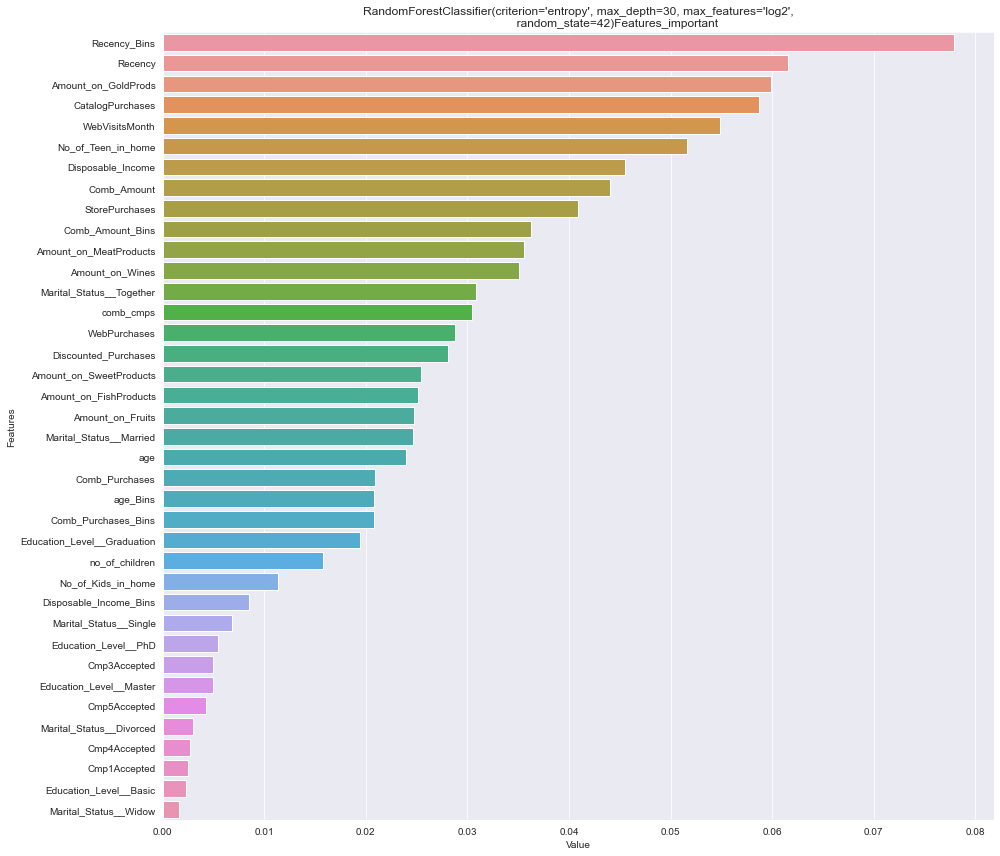

In [46]:
skf = StratifiedKFold(n_splits=6, random_state=seed,shuffle=True)
rf = RandomForestClassifier(random_state=seed, criterion='entropy', max_features='log2', max_depth=30)
# training the model
thresh = 0.4
rf.fit(X_train_sam, y_train_sam)
y_pred = rf.predict(X_test)
print(f1_score(y_test, y_pred))
print(f1_score(y_test, np.where(rf.predict_proba(X_test)[:,1] > thresh, 1, 0)))

plt.figure(figsize=(14, 12))
feat_imp_ploter(rf, X)

np.mean(cross_val_score(rf, X_train_sam, y_train_sam, scoring = 'f1', cv = skf))

In [45]:
skf = StratifiedKFold(n_splits=6, random_state=43,shuffle=True)

rf = RandomForestClassifier(random_state=43, class_weight='balanced_subsample')

param_grid = {'criterion' : ['entropy', 'gini'],
              'max_depth' : [5,10,20,30],
              'max_features' : ['log2', 'sqrt', 'auto']},
# training model
model1 = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    scoring = {'f1_score' : make_scorer(f1_score), 'auc_score' : make_scorer(roc_auc_score)},
    refit = 'f1_score',
    cv = skf,
    n_jobs = -1,
)
# training the model
model1 = model1.fit(X_train_sam, y_train_sam)

model = model1.best_estimator_

y_pred = model.predict(X_test)
y_pred1 = np.where(model.predict_proba(X_test)[:,1] > 0.299, 1, 0)
print(f1_score(y_test, y_pred))
print(f1_score(y_test, y_pred1))

=============Fold0============
0.36666666666666664
0.2798833819241982
=============Fold1============
0.3565217391304348
0.281524926686217
=============Fold2============
0.37768240343347637
0.2798833819241982
=============Fold3============
0.33636363636363636
0.2603550295857988
=============Fold4============
0.3893805309734513
0.2729970326409496
rf_score 0.36532299531353307
rf_proba 0.27492875055227234


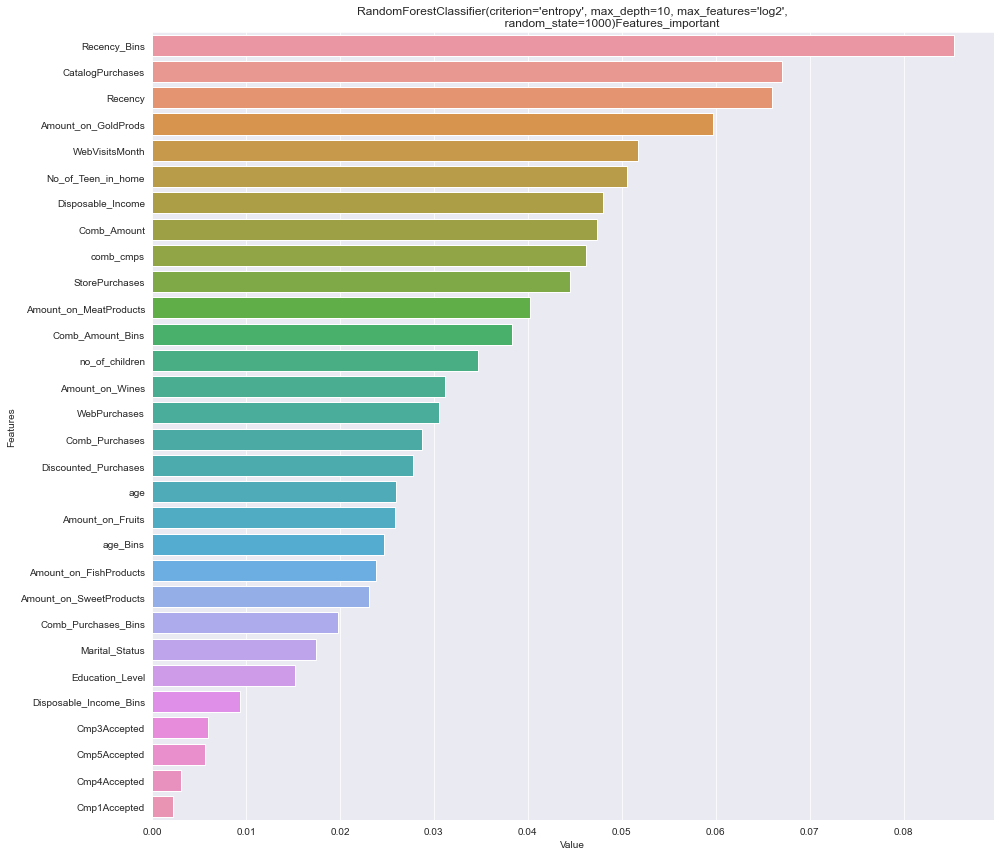

In [39]:
kf = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)
rf_score = []
rf_proba = []
thresh = 0.4
for fold,(tr_in,te_in) in enumerate(kf.split(X,y)):
    print("=============Fold{fold}============".format(fold=fold))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    rf = RandomForestClassifier(random_state=1000, criterion='entropy', max_features='log2', max_depth=10)
    rf.fit(X_train_sam, y_train_sam)
    rf_score.append(f1_score(y_test,rf.predict(X_test)))
    rf_proba.append(f1_score(y_test,np.where(rf.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test, rf.predict(X_test)))
    print(f1_score(y_test, np.where(rf.predict_proba(X_test)[:,1] > thresh, 1, 0)))

print('rf_score ' + str(np.mean(rf_score)))
print('rf_proba ' + str(np.mean(rf_proba)))

plt.figure(figsize=(14,12))
feat_imp_ploter(rf, X)

0.5365853658536586
0.5802469135802469


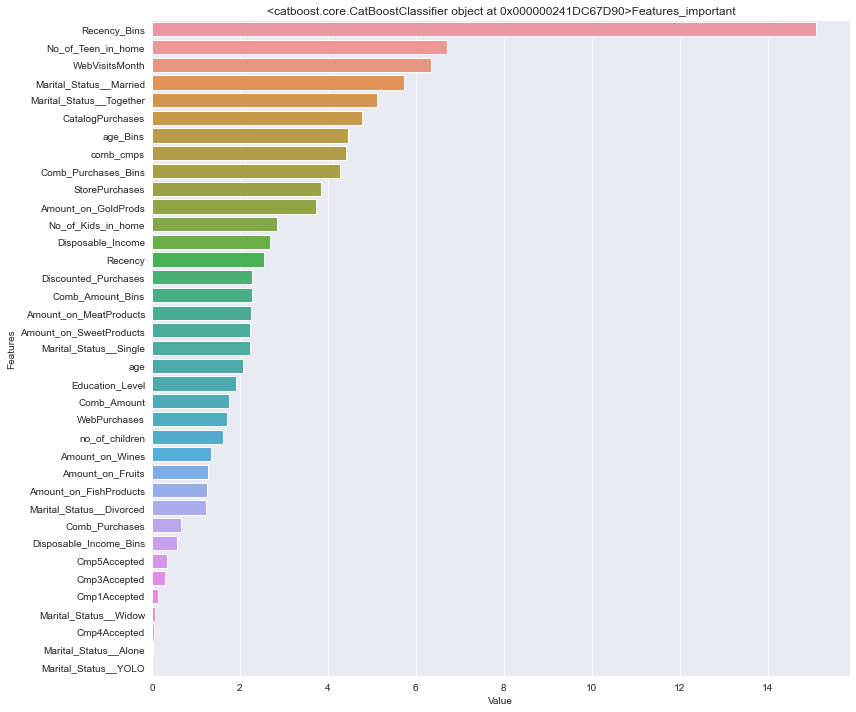

In [41]:
skf = StratifiedKFold(n_splits=6, random_state=seed,shuffle=True)
catb = CatBoostClassifier(verbose = 0, eval_metric = 'F1')
# training the model
thresh = 0.26
catb.fit(X_train_sam, y_train_sam)
y_pred = catb.predict(X_test)
print(f1_score(y_test, y_pred))
print(f1_score(y_test, np.where(catb.predict_proba(X_test)[:,1] > thresh, 1, 0)))

plt.figure(figsize=(12, 10))
feat_imp_ploter(catb, X)

In [ ]:
skf = StratifiedKFold(n_splits=5,random_state=100,shuffle=True)
cat_scores = []
cat_proba = []
thresh = 0.4
cat_features = X.columns[np.where(X.dtypes != float)[0]].values.tolist()
train_n[cat_features] = train_n[cat_features].astype(str)
for fold,(tr_in,te_in) in enumerate(skf.split(X,y)):
    print("========Fold{fold}========".format(fold=fold+1))
    X_train,X_test = X.iloc[tr_in],X.iloc[te_in]
    y_train,y_test = y.iloc[tr_in],y.iloc[te_in]
    cat = CatBoostClassifier(verbose = 0)
    cat.fit(X_train,y_train, cat_features = cat_features, eval_set = [(X_train,y_train),(X_test,y_test)], early_stopping_rounds = 500, use_best_model = True)
    cat_scores.append(f1_score(y_test,cat.predict(X_test)))
    cat_proba.append(f1_score(y_test, np.where(cat.predict_proba(X_test)[:,1] > thresh, 1, 0)))
    print(f1_score(y_test,cat.predict(X_test)))
    print(f1_score(y_test, np.where(cat.predict_proba(X_test)[:,1] > thresh, 1, 0)),'\n')

print('cat_score ' + str(np.mean(cat_scores)))
print('cat_proba ' + str(np.mean(cat_proba)))

plt.figure(figsize=(12, 10))
feat_imp_ploter(cat, X)

In [47]:
X.columns

Index(['Disposable_Income', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Comb_Amount', 'Comb_Purchases', 'age', 'no_of_children', 'comb_cmps',
       'Recency_Bins', 'age_Bins', 'Disposable_Income_Bins',
       'Comb_Amount_Bins', 'Comb_Purchases_Bins', 'Marital_Status__Divorced',
       'Marital_Status__Married', 'Marital_Status__Single',
       'Marital_Status__Together', 'Marital_Status__Widow',
       'Education_Level__Basic', 'Education_Level__Graduation',
       'Education_Level__Master', 'Education_Level__PhD'],
      dtype='object')